In [13]:
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear,sigmoid,relu
import matplotlib.pyplot as plt

In [15]:
def plt_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [17]:
def activation_func():
    fig, axs = plt.subplots(1, 3, figsize=(5, 4))
    fig.tight_layout(pad=0.13,rect=[1, 0.3, 3, 0.91])
    axs[0].plot(x1,y1)
    axs[0].set_title('Linear')
    axs[1].plot(x1,y2)
    axs[1].set_title('Sigmoid')
    axs[2].plot(x1,y3)
    axs[2].set_title('ReLU')

In [19]:
#Plotting the activation functions
x1=np.arange(-5,5.001,0.001)
y1=x1
y2=1/(1+np.exp(-x1))
y3=np.zeros(x1.shape[0])
ind=0
for i in x1:
    if(i>0):
        y3[ind]=i
    else:
        y3[ind]=0
    ind+=1

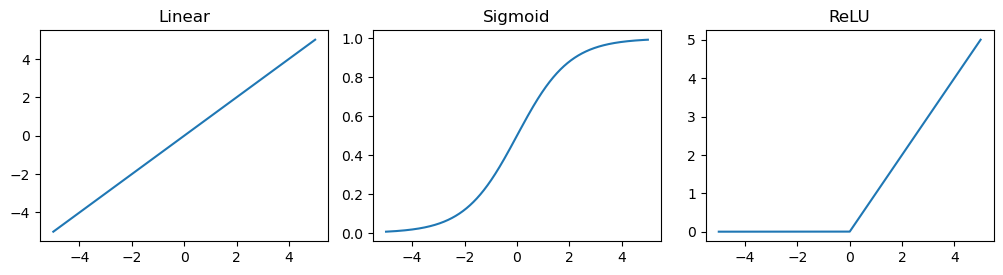

In [21]:
#Plotting the Activation Functions for a better Intuition 
activation_func()

In [23]:
# Incase i wanted the output in probability format
def my_softmax(z):  
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """  
    a=np.zeros(z.shape[0])
    exp=np.exp(z).sum()
    for i in range(z.shape[0]):
        a[i]=np.exp(z[i])/exp
    return 

In [27]:
# Readind Training Data set 
df=pd.read_csv('mnist_train.csv',header=None)
df.shape

(60000, 785)

In [29]:
df_train=df.iloc[:5000,:] # taking the first 5000 rows only for fast combutaion
df_test=df.iloc[5000:6000 ,:]

In [31]:
y_train=(df_train.iloc[:,0]).to_numpy().reshape(5000,1)
x_train=(df_train.iloc[:,1:786]).to_numpy()
x_test=(df_test.iloc[:,1:786]).to_numpy()
y_test=(df_test.iloc[:,0]).to_numpy().reshape(1000,1)

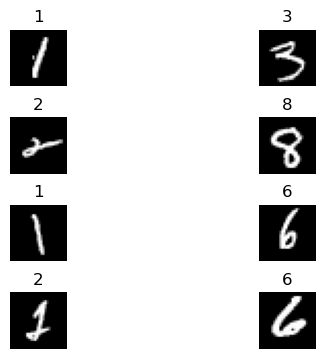

In [33]:
# Visualize the Data for a better understanding 
m,n =x_train.shape
fig, axs = plt.subplots(4, 2, figsize=(5, 4))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])
for i in range(4):
    for j in range(2):
        random_index=np.random.randint(m)
        axs[i,j].imshow(x_train[random_index].reshape((28,28)),cmap='gray')  #Reshape each row to a 28*28 pixel 
        axs[i,j].set_title(y_train[random_index,0],)                         #Photo
        axs[i,j].set_axis_off()

In [35]:
#Creating the Neural Network using TensorFlow
tf.random.set_seed(1234) # for consistent results
model= Sequential(
   [   tf.keras.Input(shape=(784,)),
       Dense(25,activation='relu',name='L1'),
       Dense(15,activation='relu',name='L2'),
       Dense(10,activation='linear',name='L3')
   ],
    name='my_model')

In [37]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 25)                  │          19,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L2 (Dense)                           │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L3 (Dense)                           │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,175 (78.81 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
[layer1, layer2, layer3] = model.layers

In [41]:
# Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [43]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)
history= model.fit(
    x_train,y_train,
    epochs=80
)

Epoch 1/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15.4749
Epoch 2/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9782
Epoch 3/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7245
Epoch 4/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5726
Epoch 5/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4946
Epoch 6/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3491  
Epoch 7/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2135
Epoch 8/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1702
Epoch 9/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1674
Epoch 10/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 1.0581
Epoch 11/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0495
Epoch 12/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9846
Epoch 13/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9344
Epoch 14/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9036
Epoch 15/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

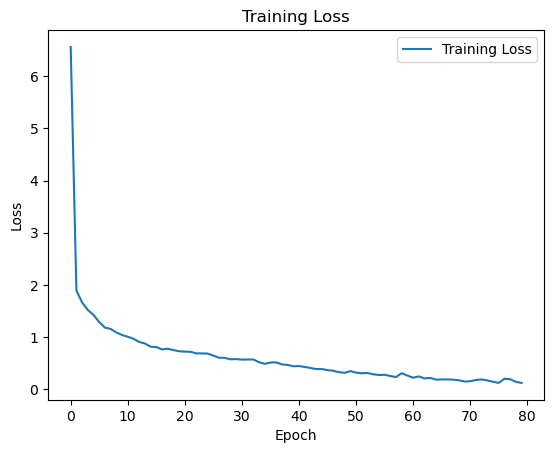

In [45]:
# See how the 'Loss' of the Neural Network is reducing
plt_loss(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
 predicting a Nine: 
[[ 1.9757867e-02  4.1383014e+00  1.2921415e+01  2.3802986e+00
   2.6670731e+01  7.2759643e+00  7.8248754e+00  1.9189621e+01
  -5.5303574e-02  2.8964254e+01]]
 Largest Prediction index: 9


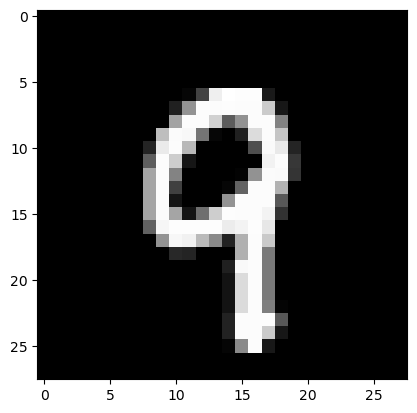

In [47]:
image_of_nine = x_train[350]
plt.imshow(image_of_nine.reshape((28,28)),cmap='gray')
prediction = model.predict(image_of_nine.reshape(1,784))  # prediction
print(f" predicting a Nine: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


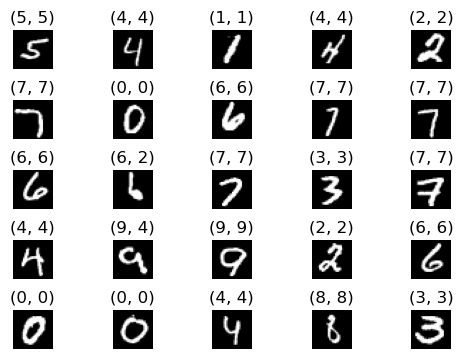

In [49]:
#Comparing the Neural Network output with the Actual output 
m,n =x_test.shape
fig, axs = plt.subplots(5, 5, figsize=(5, 4))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])
for i in range(5):
    for j in range(5):
        random_index=np.random.randint(m)
        axs[i,j].imshow(x_test[random_index].reshape((28,28)),cmap='gray')  
        prediction = model.predict(x_test[random_index].reshape(1,784)) 
        y_hat=np.argmax(prediction )
        axs[i,j].set_title(f'{y_test[random_index,0],y_hat}')                         
        axs[i,j].set_axis_off()

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,np.array([[np.argmax(x) for x in model.predict(x_train)]]).reshape(5000,1))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step


0.967

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_train,np.array([[np.argmax(x) for x in model.predict(x_train)]]).reshape(5000,1)))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       479
           1       1.00      0.98      0.99       563
           2       1.00      0.94      0.97       488
           3       0.89      0.96      0.92       493
           4       0.96      0.99      0.97       535
           5       1.00      0.93      0.96       434
           6       0.99      1.00      0.99       501
           7       0.98      0.99      0.98       550
           8       0.89      0.96      0.92       462
           9       1.00      0.91      0.95       495

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000

